<a href="https://colab.research.google.com/github/Jovania/Projetos-01/blob/master/classification_IRIS_visualizacao_e_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando Análise de Dados no Dataset Iris e ML usando o Kaggle e Colab

A proposta deste dabook é explorar ferramentas de visualização de dados e datasets dos Kaggle.

![image.png](attachment:image.png)

Source: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

Content:

1. [Importing the Necessary Libraries](#1)
1. [Read Datas & Explanation of Features & Information About Datasets](#2)
   1. [Variable Descriptions](#3)
   1. [Univariate Variable Analysis](#4)
      1. [Categorical Variables](#5)
      1. [Numerical Variables](#6)
1. [Correlation](#7)
1. [Data Visualization](#8)
1. [Pandas Profiling](#9)
1. [Train-Test Split](#10)
1. [Scores of Models](#11)
1. [Best Features Selection](#12)
1. [Dimensionality Reduction](#13)
   1. [Principle Component Analysis (PCA)](#14)
   1. [Linear Discriminant Analysis (LDA)](#15)
1. [Conclusion](#16)      

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="1"></a> 
# Importando Bibliotecas Necessárias

In [10]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
from sklearn import preprocessing

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

<a id="2"></a> 
# Lê e apresenta informações sobre o Dataset

In [11]:
dataset = pandas.read_csv('/content/drive/MyDrive/Doutorado/Iris.csv')
dataset.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
29,30,4.7,3.2,1.6,0.2,Iris-setosa
138,139,6.0,3.0,4.8,1.8,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
107,108,7.3,2.9,6.3,1.8,Iris-virginica
110,111,6.5,3.2,5.1,2.0,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica


Tirando fora a coluna com as informações de ID

In [12]:
dataset.drop("Id", axis=1, inplace=True)

<a id="3"></a> 
## Descrição das Variáveis

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<a id="4"></a> 
## Análise das Variáveis

*** Categorical Variables:** ['Species']

*** Numerical Variables:** ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

<a id="5"></a> 
### Variáveis Categóricas

In [14]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [15]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['Species']


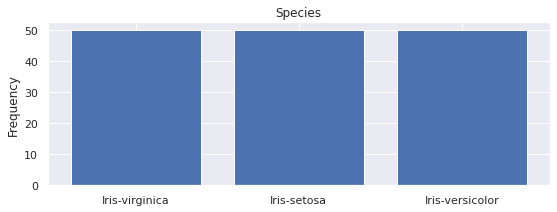

Species:
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


In [16]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

<a id="6"></a> 
### Variáveis Numéricas

In [17]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [18]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

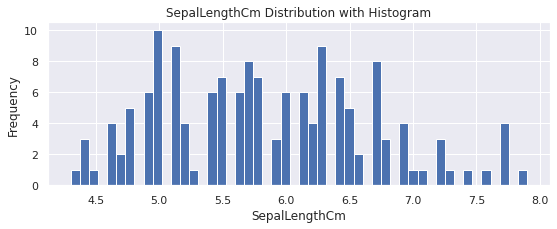

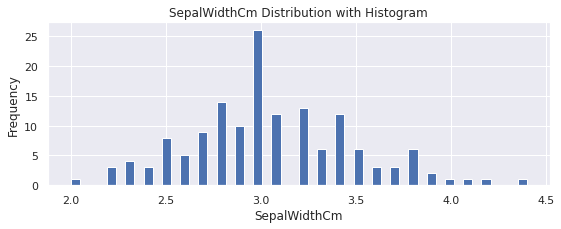

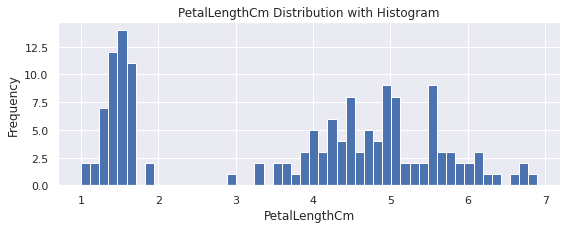

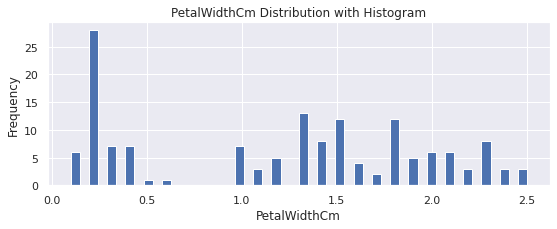

In [19]:
for n in numerical_float64_list:
    plot_hist(n)

Text(0.5, 1.0, 'PetalWidthCm Interval and Counts')

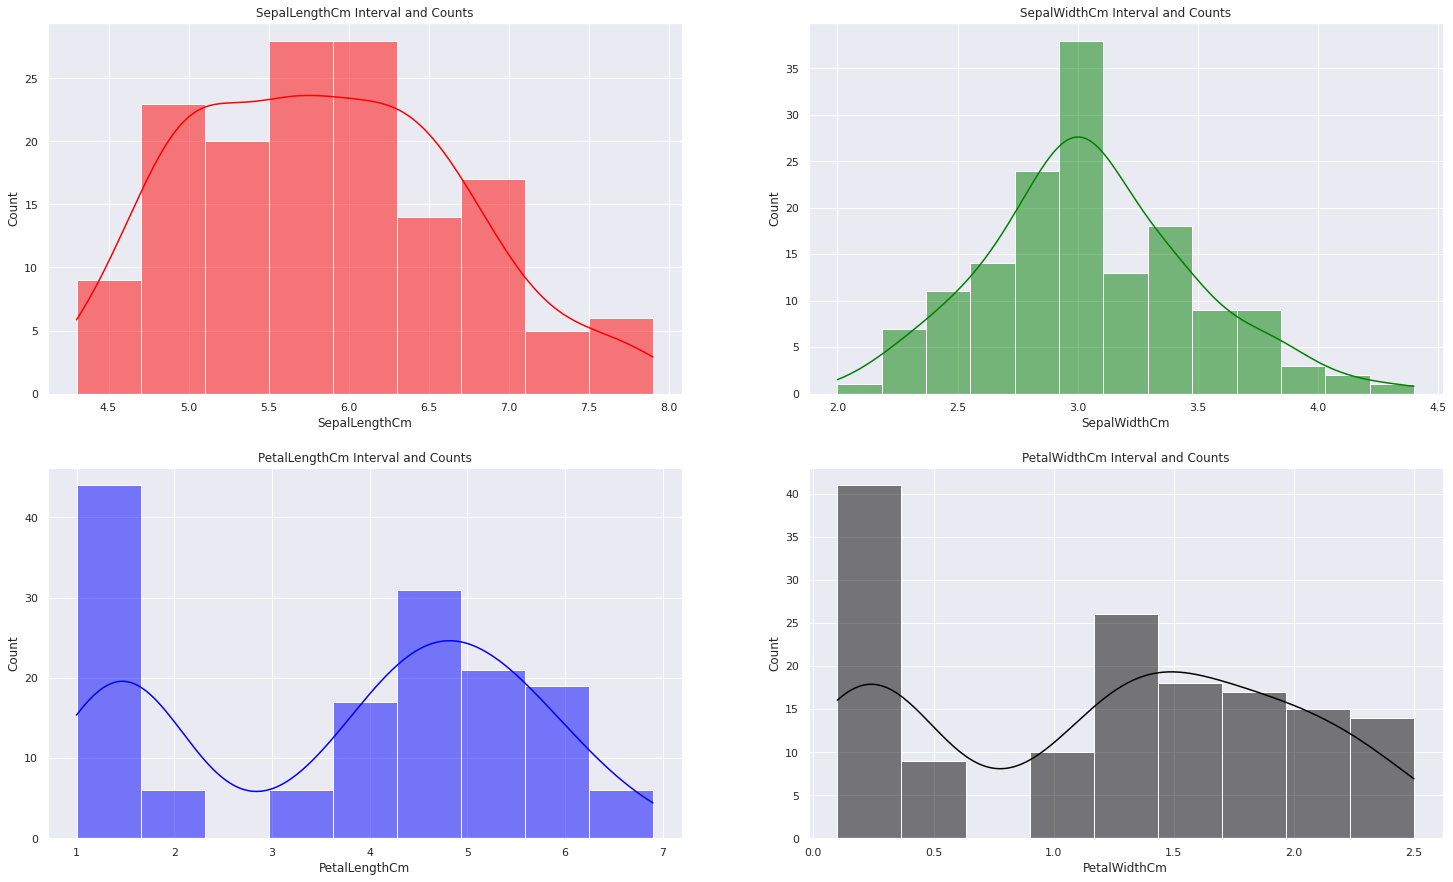

In [20]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(dataset['SepalLengthCm'], color = 'red', kde = True).set_title('SepalLengthCm Interval and Counts')

plt.subplot(2,2,2)
sns.histplot(dataset['SepalWidthCm'], color = 'green', kde = True).set_title('SepalWidthCm Interval and Counts')

plt.subplot(2,2,3)
sns.histplot(dataset['PetalLengthCm'], kde = True, color = 'blue').set_title('PetalLengthCm Interval and Counts')

plt.subplot(2,2,4)
sns.histplot(dataset['PetalWidthCm'], kde = True, color = 'black').set_title('PetalWidthCm Interval and Counts')

<a id="7"></a> 
# Correlação

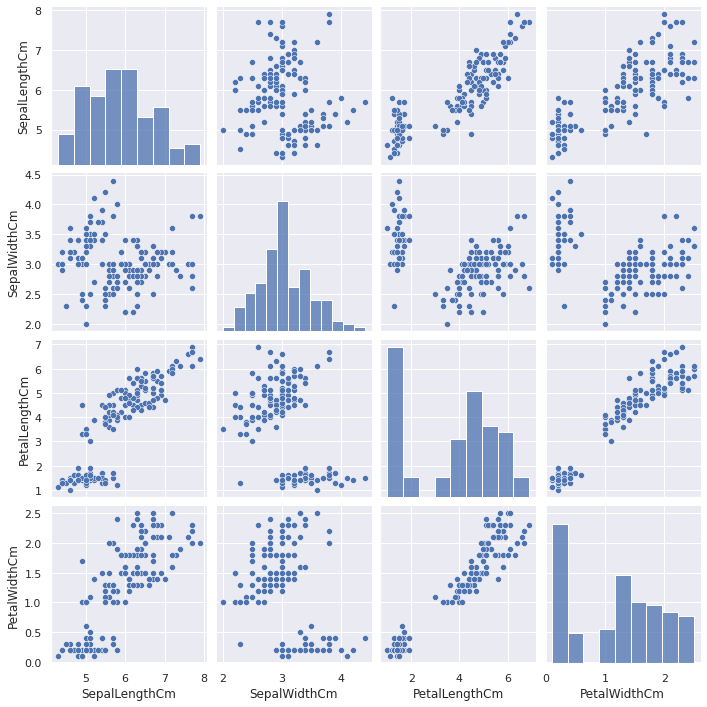

In [21]:
features = dataset.columns
sns.set_style('darkgrid')
sns.pairplot(dataset[features])

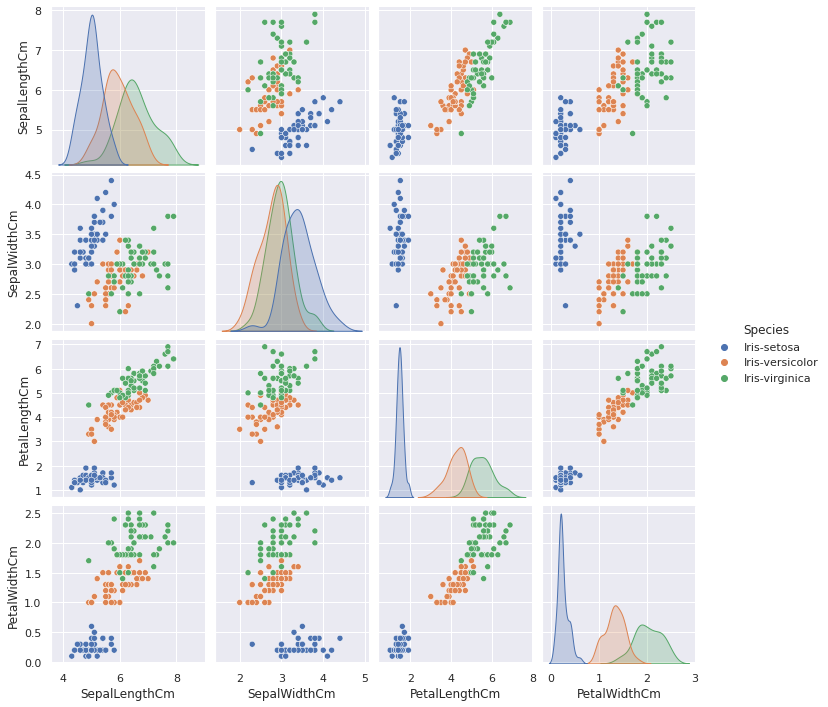

In [22]:
sns.pairplot(dataset, hue = 'Species')

In [23]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


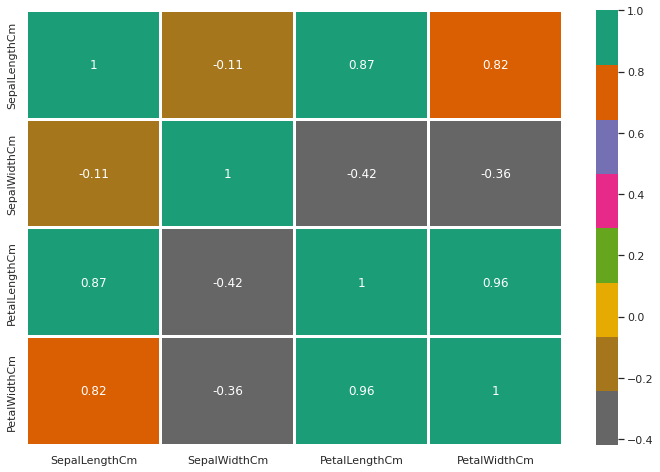

In [24]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

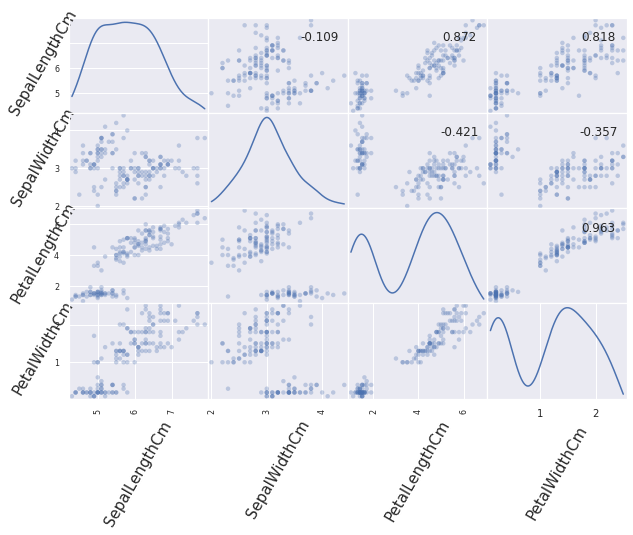

In [25]:
sns.set_style('darkgrid')
axes = pandas.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (10,7), diagonal = 'kde' ,s=80)
corr = dataset.corr().values

plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)
# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")

<a id="8"></a> 
# Visualização

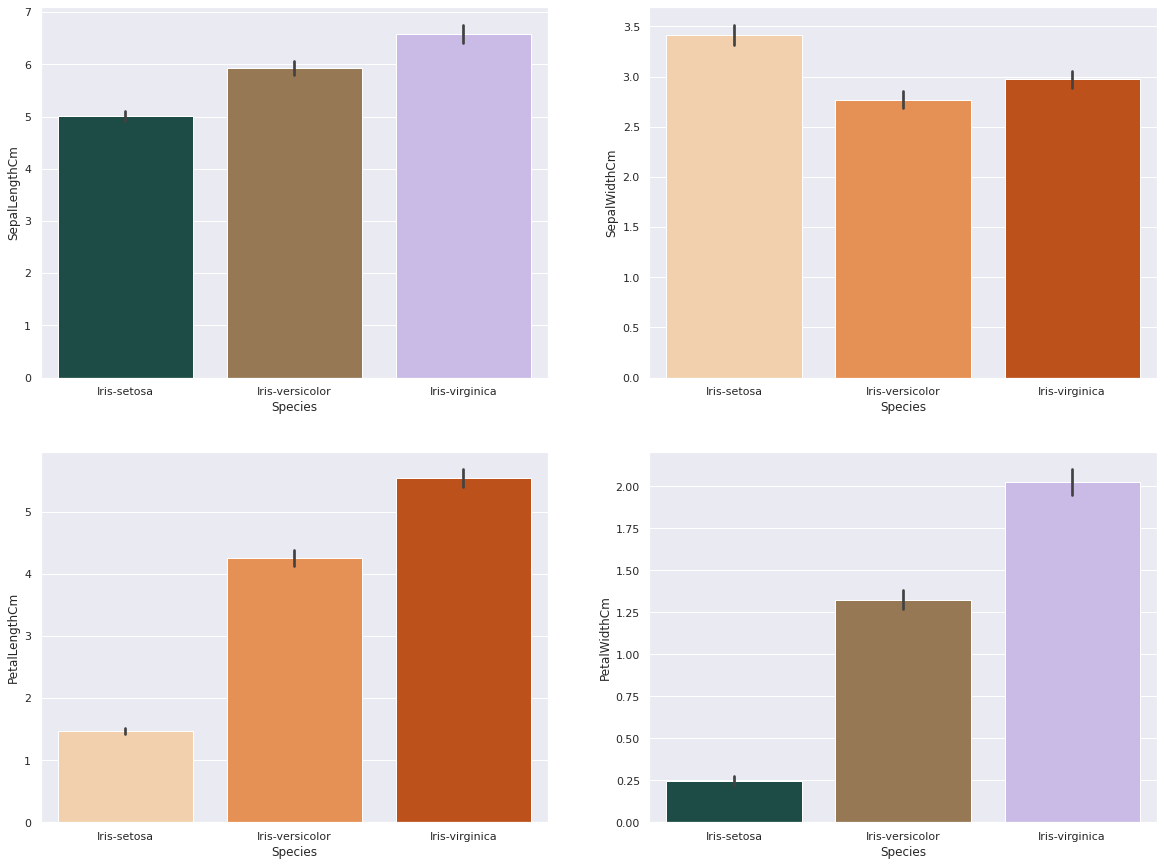

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = dataset, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = dataset, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = dataset, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = dataset, palette="cubehelix")

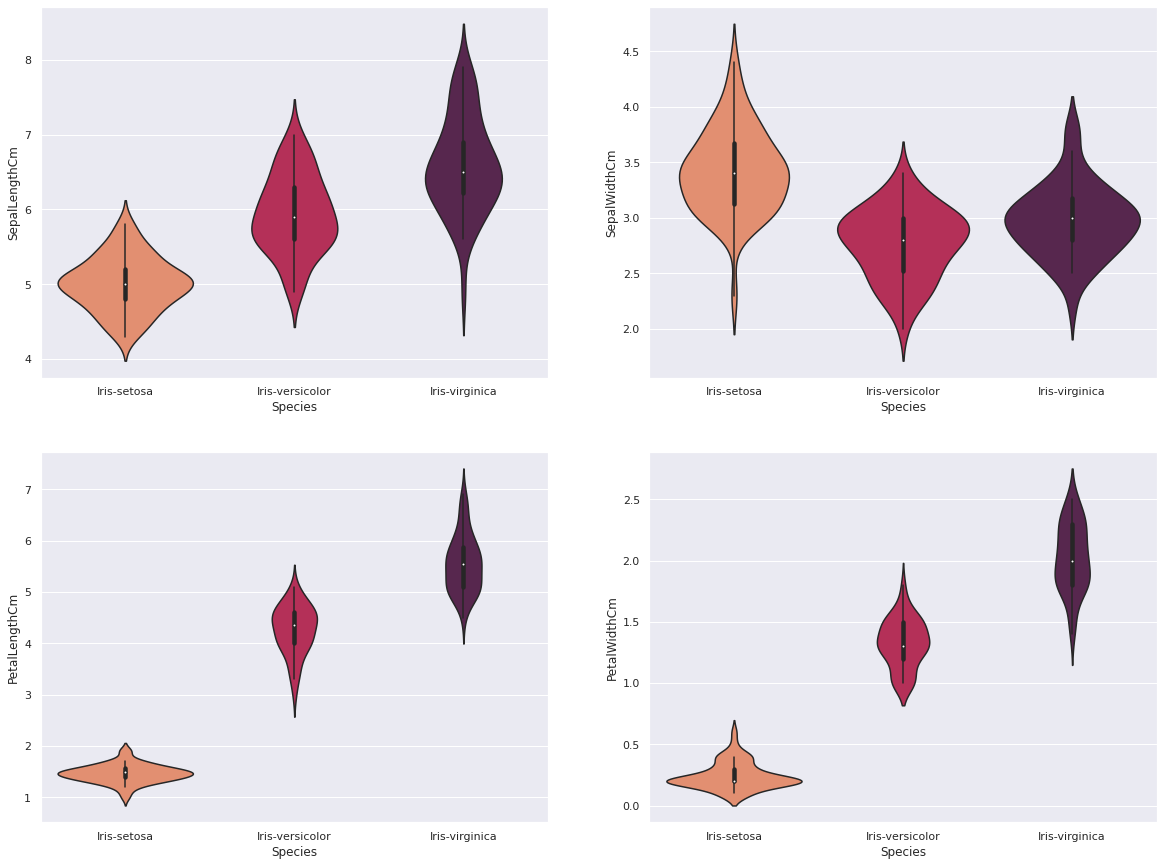

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = dataset, palette="rocket_r")
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = dataset, palette="rocket_r")
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = dataset, palette="rocket_r")
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = dataset, palette="rocket_r")

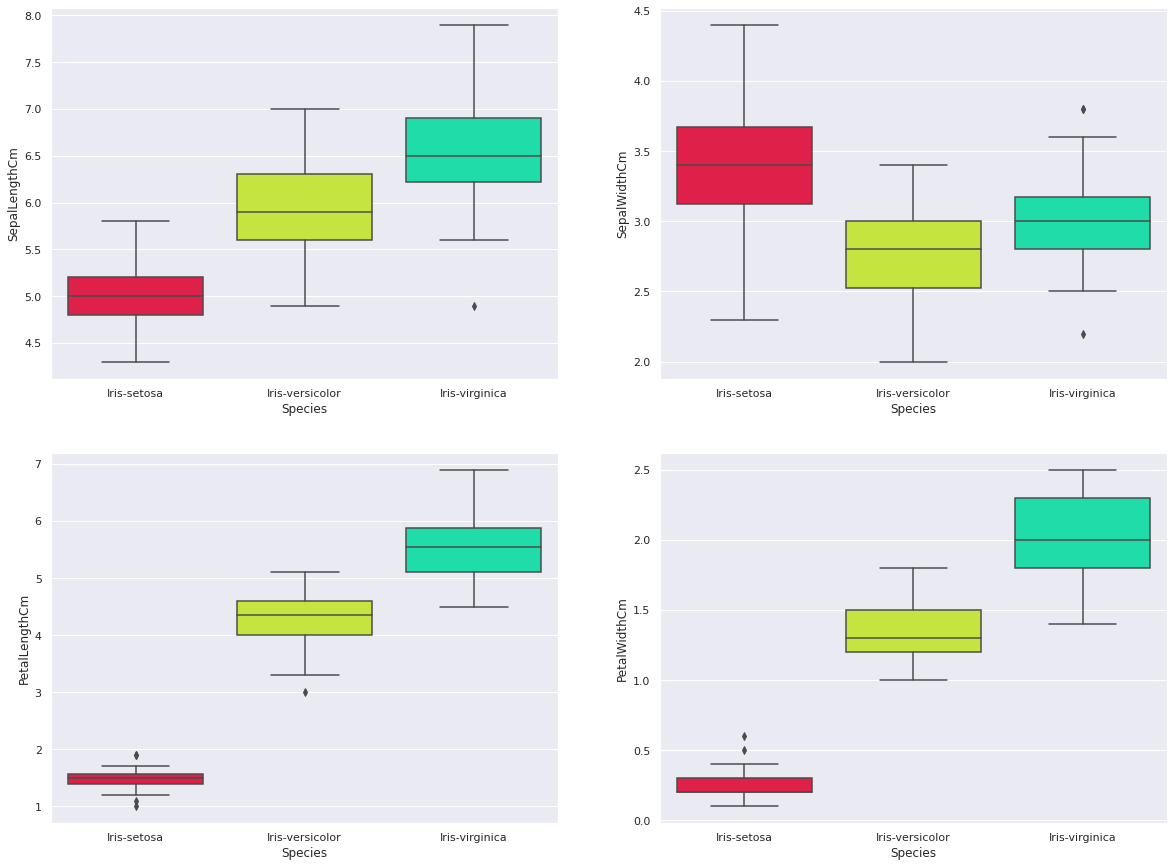

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = dataset, palette="gist_ncar_r")
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = dataset, palette="gist_ncar_r")
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = dataset, palette="gist_ncar_r")
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = dataset, palette="gist_ncar_r")

Text(0.5, 1.0, 'PetalWidth Interval')

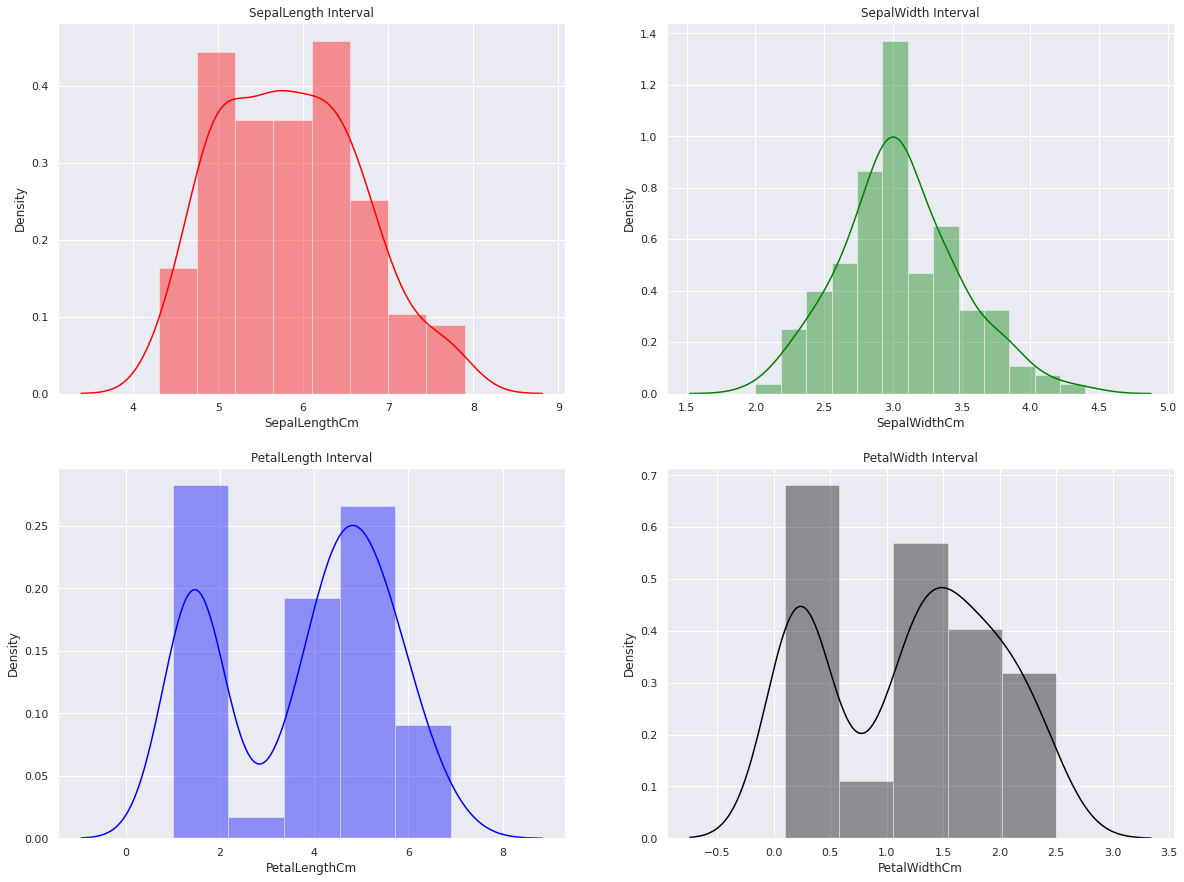

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(dataset['SepalLengthCm'], color="red").set_title('SepalLength Interval')
plt.subplot(2,2,2)
sns.distplot(dataset['SepalWidthCm'], color="green").set_title('SepalWidth Interval')
plt.subplot(2,2,3)
sns.distplot(dataset['PetalLengthCm'], color="blue").set_title('PetalLength Interval')
plt.subplot(2,2,4)
sns.distplot(dataset['PetalWidthCm'], color="black").set_title('PetalWidth Interval')

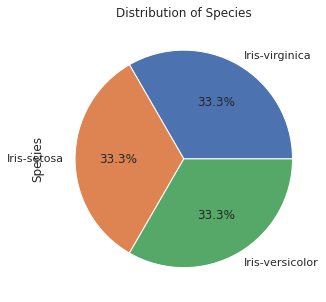

In [30]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Species")
dataset['Species'].value_counts().plot.pie(autopct="%1.1f%%")

<a id="9"></a> 
# PERFIL Pandas

Pandas profiling é uma biblioteca bem útil que gera relatórios sobre os dados. Com ele pode-se recuperar os tipos de dados, sua  distribuição e várias informações estatísticas. A ferramenta tem muitas técnicas para preparação dos dados. Bibliotecas gráficas envolvendo mapas de características e correlação. Mais detalhes em: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [33]:
from pandas_profiling import ProfileReport
# import pandas_profiling as pp pp.ProfileReport(dataset)

<a id="10"></a> 
# Divisão entre Treinamento e Teste

In [34]:
X = dataset.iloc[:,0:4].values 
y = dataset.iloc[:,4:].values 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 150
Total # of sample in train dataset: 100
Total # of sample in validation dataset: 25
Total # of sample in test dataset: 25


Standardization é um método que transforma os dados de forma a se ter média zero e desvio padrão de 1 e a distribuição tende a ser normal. A fórmula envolve a subtração do valor médio seguida pela divisão pela variança.

In [36]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="11"></a> 
# Scores dos Modelos

Aplicam-se algoritmos de ML ao dataset. Os resultados conterão scores de treinamento, teste e validação, matriz de confusão, informações estatísticas e relatórios de classificação para cada algoritmo.

In [37]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 96.0
Validation score of trained model: 16.0
Test score of trained model: 96.0
 
Confussion Matrix: 
[[ 5  0  0]
 [ 0 11  1]
 [ 0  0  8]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        25
      macro avg       0.96      0.97      0.97        25
   weighted avg       0.96      0.96      0.96        25



############################################################################



BernoulliNB
Train score of trained model: 75.0
Validation score of trained model: 16.0
Test score of trained model: 76.0
 
Confussion Matrix: 
[[5 1 0]
 [0 5 0]
 [0 5 9]]

Accuracy : 0.9090909090909091
Precision: 0.8333333333333334
R

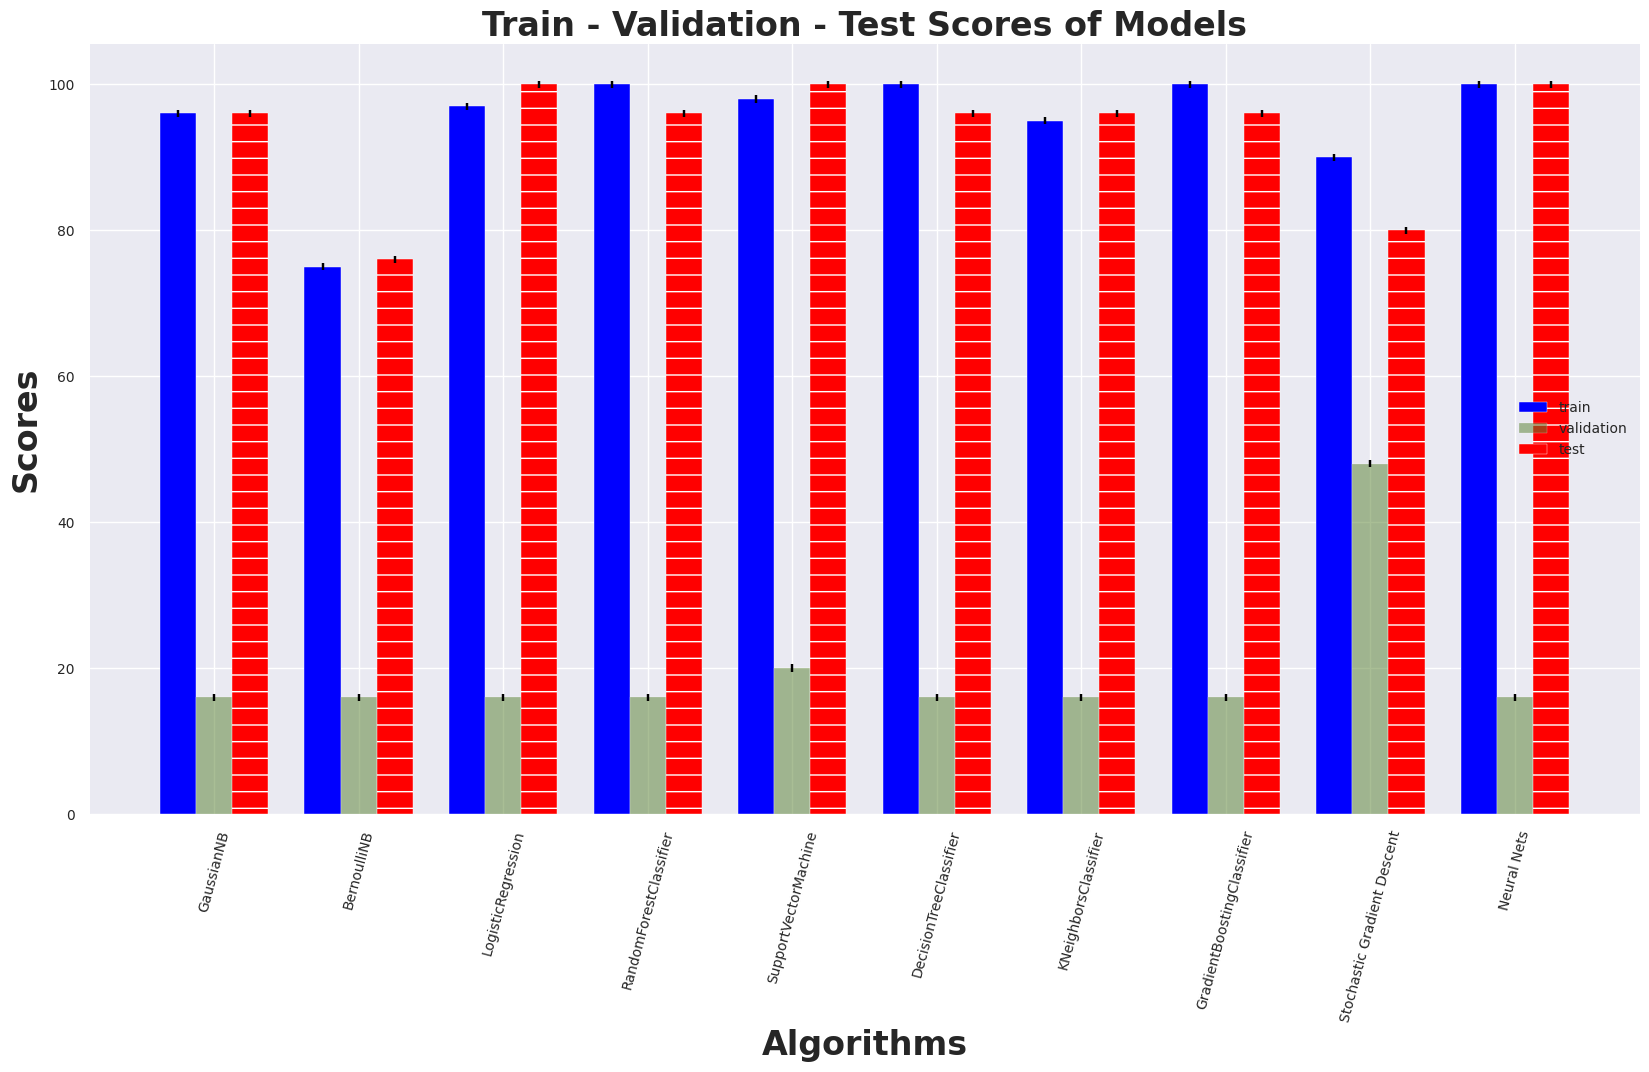

In [38]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [39]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 96.0
Accuracy of BernoulliNB -----> 76.0
Accuracy of LogisticRegression -----> 100.0
Accuracy of RandomForestClassifier -----> 96.0
Accuracy of SupportVectorMachine -----> 100.0
Accuracy of DecisionTreeClassifier -----> 96.0
Accuracy of KNeighborsClassifier -----> 96.0
Accuracy of GradientBoostingClassifier -----> 96.0
Accuracy of Stochastic Gradient Descent -----> 80.0
Accuracy of Neural Nets -----> 100.0


<a id="12"></a>
# Seleção das Melhores Features

In [40]:
models = {
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

BernoulliNB
Old Shape: (150, 4) New shape: (150, 4)


LogisticRegression
Old Shape: (150, 4) New shape: (150, 2)


RandomForestClassifier
Old Shape: (150, 4) New shape: (150, 2)


DecisionTreeClassifier
Old Shape: (150, 4) New shape: (150, 1)


GradientBoostingClassifier
Old Shape: (150, 4) New shape: (150, 2)


Stochastic Gradient Descent
Old Shape: (150, 4) New shape: (150, 3)




<a id="13"></a>
# Redução Dimensional

Em ciência de dados, redução dimensional é uma transformação nos dados que diminui o número de dimensões que os representam sem perda do seu significado. Esta redução conduz a menor necessidade de processamento, sendo frequentemente usada em processamento de sinais, reconhecimento de fala, neuroinformática, bioinformática, onde um grande conjunto de observações e variáveis são examinadas.

<a id="14"></a>
## Análise de Componentes Principais (Principle Component Analysis - PCA)

PCA é uma técnica estatística muito útil usada na área de reconhecimento e classificação e compreensão de imagens, por exemplo. O princiapal objetivo é manter o conjunto de dados com alta variança, reduzindo as suas dimensões. As dimensões suprimidas contem pouca informação sobre a população. O método combina variáveis altamente correlacionadas para criar um menor conjunto de variáveis artificiais chamadas de componente principais que representamm as maiores variações dos dados. 

PCA é um método muito efetivo para revelar as informações importantes nos dados. O método busca mostrar dados multidimensionais com menores variáveis as quais capturam as características básicas das amostras.

(150, 2)


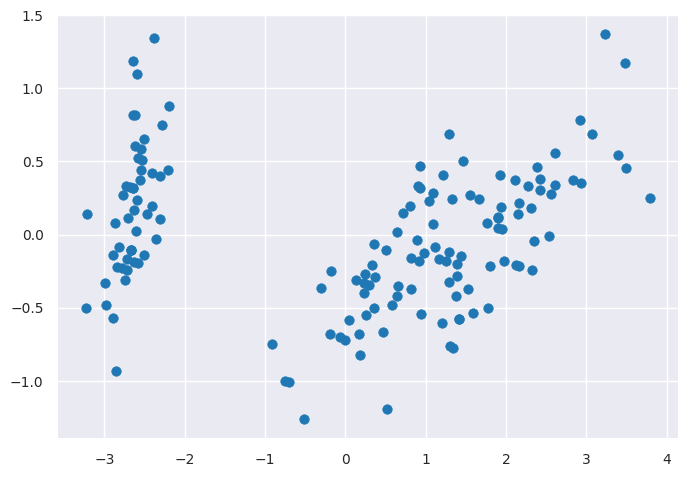

In [41]:
from sklearn.decomposition import PCA
selectedX = X[:,]

pcaX = PCA(n_components=2)
pcaX = pcaX.fit(selectedX)
pcaX = pcaX.transform(X)
print(pcaX.shape)

plt.scatter(pcaX[:,0], pcaX[:,1])
plt.show()

<a id="15"></a>
## Análise Discriminatória Linear (Linear Discriminant Analysis LDA)

Análise Discriminatória Linear é usada como técnica de redução dimensional durante o estágio de pré-processamento em aplicações de ML. O objetivo é impedir overfitting enquanto reduz custo computacional. Mesmo sendo similar ao PCA, o LDA tem como objetivo maximizar a distância entre as classes, enquanto o PCA tentar maximizar a distância entre os pontos do dataset.

Em resumo o LDA reduz o tamanho do data set através da maximização da diferença entre as classes.

(150, 2)


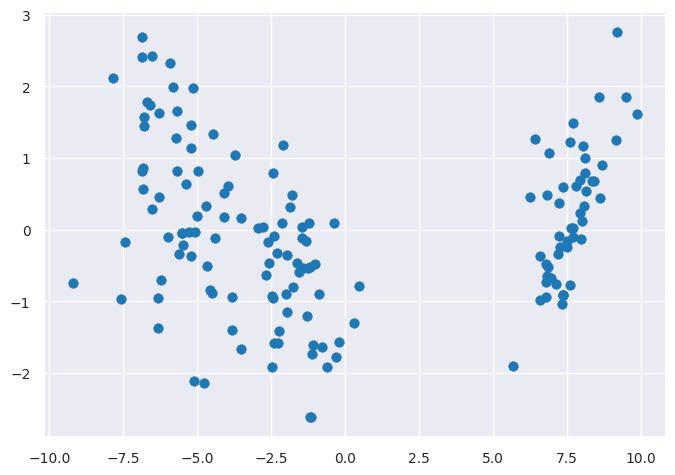

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldaX = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
print(ldaX.shape)

plt.scatter(ldaX[:,0], ldaX[:,1])
plt.show()

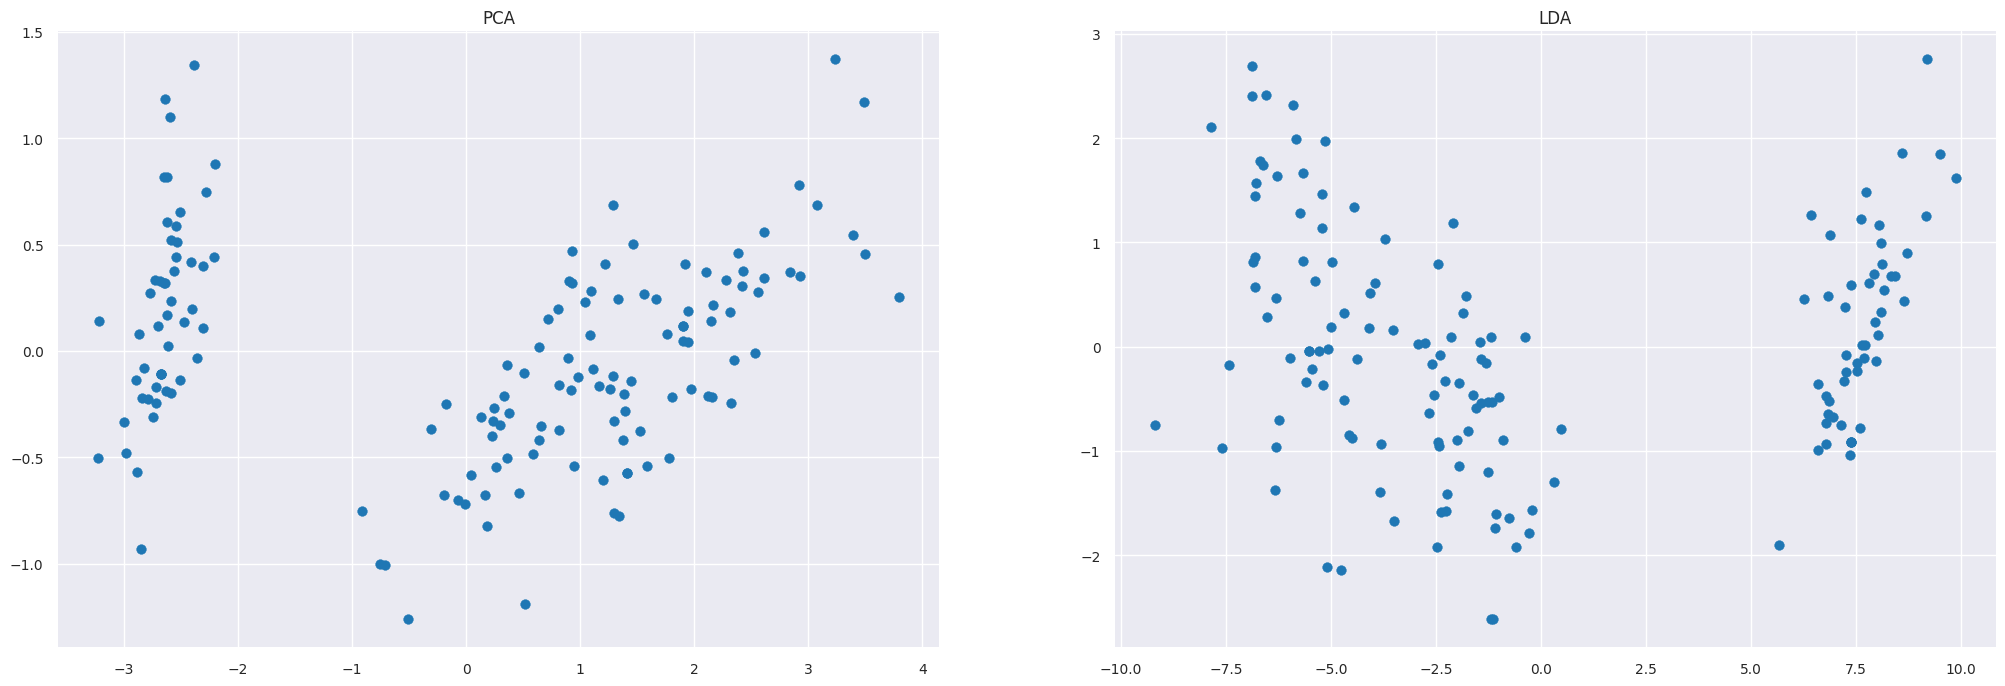

In [43]:
ldaX = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
pcaX = PCA(n_components=2).fit_transform(X, y)


plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('PCA')
plt.scatter(pcaX[:,0], pcaX[:, 1])

plt.subplot(1,2,2)
plt.title('LDA')
plt.scatter(ldaX[:,0], ldaX[:, 1])


plt.show()

<a id="16"></a> 
# Conclusion

Neste databook foi examinado o DataSet Iris: análise exploratória dos dados, visualização, técnicas de ML e métricas de avaliação, bem como redução dimensional. 
